In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_excel('Data_Train.xlsx')

In [3]:
print(train_df.shape)
print(train_df.info())
print(train_df.describe())

(10683, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None
              Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000


In [4]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
train_df[train_df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [6]:
train_df.dropna(inplace = True)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [140]:
train_df1 = train_df.Total_Stops

In [8]:
data = train_df.copy()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [10]:
def change_to_time(col):
    data[col] = pd.to_datetime(data[col])

In [11]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
for feature in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_to_time(feature)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [14]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [15]:
data['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

In [16]:
data['month'] = data['Date_of_Journey'].dt.month

In [17]:
data['day'] = data['Date_of_Journey'].dt.day

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
 11  month            10682 non-null  int64         
 12  day              10682 non-null  int64         
dtypes: datetime64[ns](3), int64(3), object(7)
memory usage: 1.1+ MB


In [19]:
def extra_hour_min(df,col):
    df[col+'_hour'] = df[col].dt.hour
    df[col+'_min'] = df[col].dt.minute
    df.drop(col,axis = 1,inplace = True)
    return df.head(2)

In [20]:
data.columns


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'month', 'day'],
      dtype='object')

In [21]:
extra_hour_min(data,'Arrival_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,month,day,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-04-12 22:20:00,2h 50m,non-stop,No info,3897,3,24,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-04-12 05:50:00,7h 25m,2 stops,No info,7662,1,5,13,15


In [27]:
extra_hour_min(data,'Dep_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,month,day,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,1,10,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50


In [22]:
def flight_dep_time(x):
    if(x>4) and (x<=8):
        return 'Early morning'
    
    elif(x>8) and (x<=12):
        return 'morning'
    
    elif(x>12) and (x<=16):
        return 'Evening'
    
    elif(x>16) and (x<=20):
        return 'Night'
    else:
        return 'Late Night'

<AxesSubplot:>

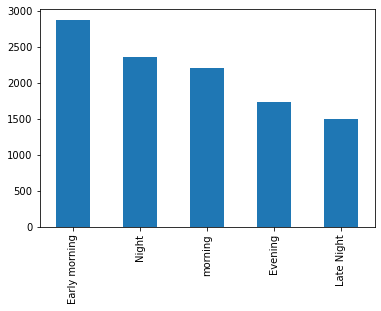

In [28]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind = 'bar')

In [ ]:
!pip install plotly

In [24]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [25]:
cf.go_offline()

In [29]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind = 'bar')

In [30]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h '+x
    elif 'm' not in x:
        x = x+' 0m'
    return x
    

In [46]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [36]:
data['Duration'][0]

'2h 50m'

In [37]:
data['Duration'][0].split(' ') 

['2h', '50m']

In [42]:
int(data['Duration'][0].split(' ')[0][0:-1])

2

In [43]:
int(data['Duration'][0].split(' ')[1][0:-1])

50

In [49]:
data['Duration_hours'] = data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [50]:
data['Duration_mins'] = data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Airline            10682 non-null  object        
 1   Date_of_Journey    10682 non-null  datetime64[ns]
 2   Source             10682 non-null  object        
 3   Destination        10682 non-null  object        
 4   Route              10682 non-null  object        
 5   Duration           10682 non-null  object        
 6   Total_Stops        10682 non-null  object        
 7   Additional_Info    10682 non-null  object        
 8   Price              10682 non-null  int64         
 9   month              10682 non-null  int64         
 10  day                10682 non-null  int64         
 11  Arrival_Time_hour  10682 non-null  int64         
 12  Arrival_Time_min   10682 non-null  int64         
 13  Dep_Time_hour      10682 non-null  int64         
 14  Dep_Ti

In [52]:
data['Duration_total_mins'] = data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [53]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,month,day,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,1,10,22,20,2,50,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50,7,25,445


In [54]:
#'2h 50m'
'2*60+50*1'

'2*60+50*m'

In [56]:
eval('2*60+50*1')

170

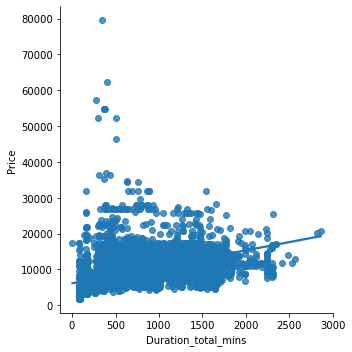

In [57]:
sns.lmplot(x = 'Duration_total_mins',y = 'Price',data = data)

<AxesSubplot:ylabel='Destination'>

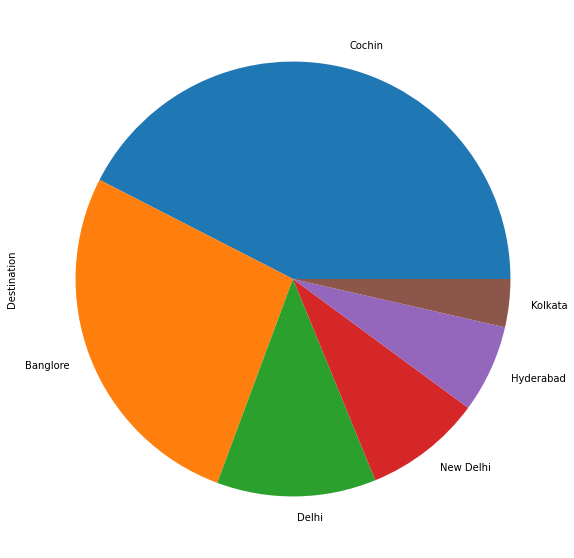

In [65]:
plt.figure(figsize = (15,10))
data['Destination'].value_counts().plot(kind = 'pie')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

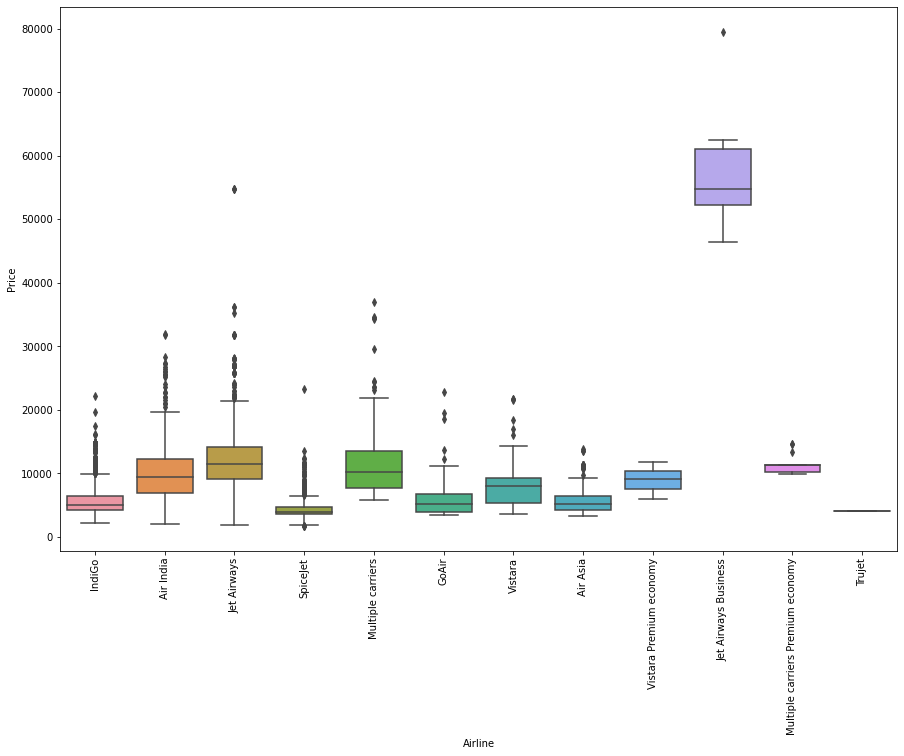

In [66]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'Airline',y = 'Price',data = data)
plt.xticks(rotation = 'vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

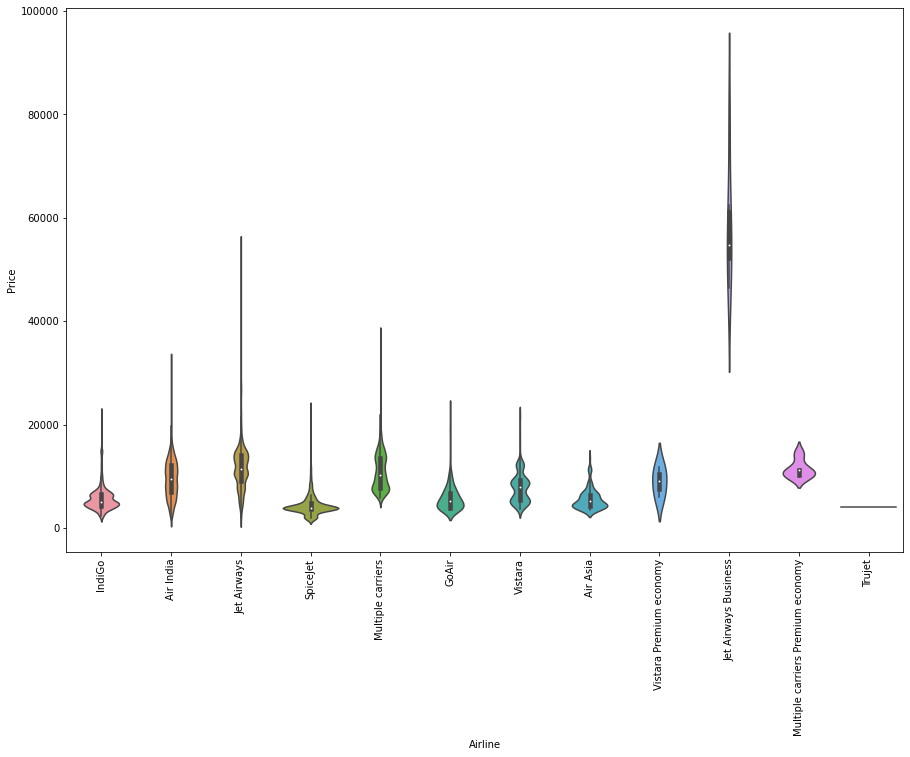

In [71]:
plt.figure(figsize = (15,10))
sns.violinplot(x = 'Airline',y = 'Price',data = data)
plt.xticks(rotation = 'vertical')


In [76]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'month', 'day',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Dep_Time_hour',
       'Dep_Time_min', 'Duration_hours', 'Duration_mins',
       'Duration_total_mins'],
      dtype='object')

In [75]:
np.round((data.Additional_Info.value_counts()/len(data))*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [82]:
# we need to drop this column
data.drop(columns = ['Date_of_Journey'],axis = 1,inplace = True)

In [83]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'month', 'day', 'Arrival_Time_hour', 'Arrival_Time_min',
       'Dep_Time_hour', 'Dep_Time_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [84]:
data.head(4)

,Airline,Source,Destination,Duration,Total_Stops,Price,month,day,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,23,30,18,5,5,25


In [86]:
cat_col = [col for col in data.columns if data[col].dtypes == 'object']
cat_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [87]:
num_col = [col for col in data.columns if data[col].dtypes != 'object']
num_col

['Price',
 'month',
 'day',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Duration_hours',
 'Duration_mins']

In [ ]:
# here we have to apply one hot encoding to nominal data

In [89]:
data['Source'].apply(lambda x: 1 if x=='Bangalore' else 0)

0        0
1        0
2        0
3        0
4        0
        ..
10678    0
10679    0
10680    0
10681    0
10682    0
Name: Source, Length: 10682, dtype: int64

In [88]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [90]:
for category in data['Source'].unique():
    data["Source_"+category] = data['Source'].apply(lambda x: 1 if x==category else 0)

In [91]:
data

,Airline,Source,Destination,Duration,Total_Stops,Price,month,day,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,1,10,22,20,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,13,15,5,50,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,9,6,4,25,9,25,19,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,23,30,18,5,5,25,0,1,0,0,0
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,21,35,16,50,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,4107,9,4,22,25,19,55,2,30,0,1,0,0,0
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,4145,4,27,23,20,20,45,2,35,0,1,0,0,0
10680,Jet Airways,Banglore,Delhi,3h 0m,non-stop,7229,4,27,11,20,8,20,3,0,1,0,0,0,0
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,12648,1,3,14,10,11,30,2,40,1,0,0,0,0


# here is the problem with encoding is if number of categories in the column is larger, the number of features we get larger

# lets perform target guided encoding 

In [92]:
# perform manual encoding

In [99]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [102]:
# dict comprehension in enumerate
dict1 = {key:index for index,key in enumerate(airlines,0)}

In [103]:
# mapping dictionary values in Airlines to convert from string to integer values by using manual encoding()
data['Airline'] = data['Airline'].map(dict1)

In [105]:
data

,Airline,Source,Destination,Duration,Total_Stops,Price,month,day,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,1,10,22,20,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,13,15,5,50,7,25,0,1,0,0,0
2,10,Delhi,Cochin,19h 0m,2 stops,13882,9,6,4,25,9,25,19,0,0,0,1,0,0
3,3,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,23,30,18,5,5,25,0,1,0,0,0
4,3,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,21,35,16,50,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,Kolkata,Banglore,2h 30m,non-stop,4107,9,4,22,25,19,55,2,30,0,1,0,0,0
10679,7,Kolkata,Banglore,2h 35m,non-stop,4145,4,27,23,20,20,45,2,35,0,1,0,0,0
10680,10,Banglore,Delhi,3h 0m,non-stop,7229,4,27,11,20,8,20,3,0,1,0,0,0,0
10681,5,Banglore,New Delhi,2h 40m,non-stop,12648,1,3,14,10,11,30,2,40,1,0,0,0,0


In [107]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [108]:
data['Destination'].replace('New Delhi','Delhi',inplace = True)

In [110]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [112]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [113]:
dict2 = {key:index for index,key in enumerate(dest,0)}

In [115]:
data['Destination'] = data['Destination'].map(dict2)

In [136]:
data

,Airline,Source,Destination,Duration,Total_Stops,Price,month,day,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,NaN,3897,3,24,1,10,22,20,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,NaN,7662,1,5,13,15,5,50,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,NaN,13882,9,6,4,25,9,25,19,0,0,0,1,0,0
3,3,Kolkata,3,5h 25m,NaN,6218,12,5,23,30,18,5,5,25,0,1,0,0,0
4,3,Banglore,2,4h 45m,NaN,13302,1,3,21,35,16,50,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,Kolkata,3,2h 30m,NaN,4107,9,4,22,25,19,55,2,30,0,1,0,0,0
10679,7,Kolkata,3,2h 35m,NaN,4145,4,27,23,20,20,45,2,35,0,1,0,0,0
10680,10,Banglore,2,3h 0m,NaN,7229,4,27,11,20,8,20,3,0,1,0,0,0,0
10681,5,Banglore,2,2h 40m,NaN,12648,1,3,14,10,11,30,2,40,1,0,0,0,0


In [151]:
data.drop(columns = ['Total_Stops'],axis = 1,inplace=True)

In [152]:
data.insert(4,'Total_Stops',train_df1)

In [153]:
stops = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [155]:
data['Total_Stops'] = data['Total_Stops'].map(stops)

In [156]:

data


,Airline,Source,Destination,Duration,Total_Stops,Price,month,day,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897,3,24,1,10,22,20,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,1,5,13,15,5,50,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2,13882,9,6,4,25,9,25,19,0,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1,6218,12,5,23,30,18,5,5,25,0,1,0,0,0
4,3,Banglore,2,4h 45m,1,13302,1,3,21,35,16,50,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,Kolkata,3,2h 30m,0,4107,9,4,22,25,19,55,2,30,0,1,0,0,0
10679,7,Kolkata,3,2h 35m,0,4145,4,27,23,20,20,45,2,35,0,1,0,0,0
10680,10,Banglore,2,3h 0m,0,7229,4,27,11,20,8,20,3,0,1,0,0,0,0
10681,5,Banglore,2,2h 40m,0,12648,1,3,14,10,11,30,2,40,1,0,0,0,0


# outlier detection

In [158]:
def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col],ax = ax1)
    sns.boxplot(df[col],ax = ax2)
    sns.distplot(df[col],ax = ax1,kde = False)

In [178]:
data.drop(['Price'],axis = 1,inplace = True)

In [180]:
data.insert(4,'Price',train_df['Price'])

In [181]:
data


,Airline,Destination,Total_Stops,month,Price,day,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3,3897,24,1,10,22,20,2,50,1,0,0,0,0
1,7,3,2,1,7662,5,13,15,5,50,7,25,0,1,0,0,0
2,10,4,2,9,13882,6,4,25,9,25,19,0,0,0,1,0,0
3,3,3,1,12,6218,5,23,30,18,5,5,25,0,1,0,0,0
4,3,2,1,1,13302,3,21,35,16,50,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,0,9,4107,4,22,25,19,55,2,30,0,1,0,0,0
10679,7,3,0,4,4145,27,23,20,20,45,2,35,0,1,0,0,0
10680,10,2,0,4,7229,27,11,20,8,20,3,0,1,0,0,0,0
10681,5,2,0,1,12648,3,14,10,11,30,2,40,1,0,0,0,0


C:\Users\ranji\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\ranji\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\ranji\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



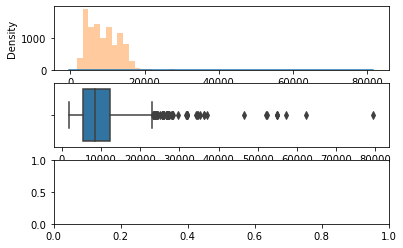

In [182]:
plot(data,'Price')

In [183]:
data['Price'] = np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

C:\Users\ranji\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\ranji\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



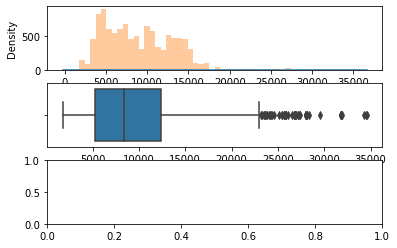

In [184]:
plot(data,'Price')

In [185]:
data.head(2)

,Airline,Destination,Total_Stops,month,Price,day,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3,3897.0,24,1,10,22,20,2,50,1,0,0,0,0
1,7,3,2,1,7662.0,5,13,15,5,50,7,25,0,1,0,0,0


# Feature Selection

In [187]:
data.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
month                  int64
Price                float64
day                    int64
Arrival_Time_hour      int64
Arrival_Time_min       int64
Dep_Time_hour          int64
Dep_Time_min           int64
Duration_hours         int64
Duration_mins          int64
Source_Banglore        int64
Source_Kolkata         int64
Source_Delhi           int64
Source_Chennai         int64
Source_Mumbai          int64
dtype: object

In [167]:
from sklearn.feature_selection import mutual_info_regression

In [188]:
X = data.drop(columns = ['Price'],axis = 1)
y = data['Price']

In [189]:
mutual_info_regression(X,y)

array([0.96577093, 1.00668488, 0.79042791, 0.24334905, 0.1963856 ,
       0.40367577, 0.35191644, 0.33339913, 0.25720574, 0.47110061,
       0.34211627, 0.37940751, 0.45780553, 0.51149498, 0.14195781,
       0.19714866])

In [191]:
imp = pd.DataFrame(mutual_info_regression(X,y),index = X.columns)
imp

,0
Airline,0.970752
Destination,0.993711
Total_Stops,0.792894
month,0.238343
day,0.194397
Arrival_Time_hour,0.406876
Arrival_Time_min,0.352580
Dep_Time_hour,0.341843
Dep_Time_min,0.263805
Duration_hours,0.465780
